In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Python Exercise 2

# 1.

In [7]:
x = np.arange(1, 6).reshape(5,1)
X = np.concatenate((np.ones((5,1)), x, x**2, x**3, x**4), axis=1)
X

array([[   1.,    1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.,   16.],
       [   1.,    3.,    9.,   27.,   81.],
       [   1.,    4.,   16.,   64.,  256.],
       [   1.,    5.,   25.,  125.,  625.]])

# 2.

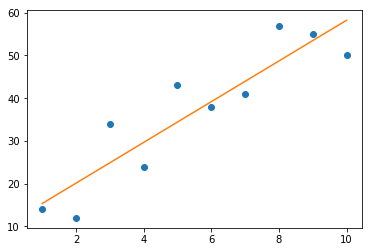

In [19]:
x = np.arange(1, 11).reshape(10, 1)
y = np.array([14, 12, 34, 24, 43, 38, 41, 57, 55, 50]).reshape(10, 1)
X = np.concatenate((np.ones((10, 1)), x), axis=1)
M = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

xx = np.linspace(1, 10, 1000).reshape(1000, 1)
XX = np.concatenate((np.ones((1000, 1)), xx), axis=1)
yy = XX.dot(M)

plt.plot(x, y, 'o')
plt.plot(xx, yy)
plt.show()

# 3.

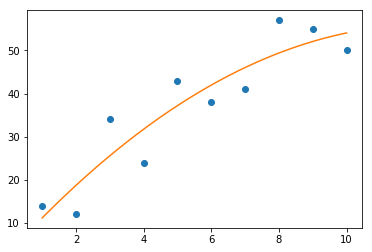

In [20]:
X = np.concatenate((np.ones((10, 1)), x, x**2), axis=1)
M = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

xx = np.linspace(1, 10, 1000).reshape(1000, 1)
XX = np.concatenate((np.ones((1000, 1)), xx, xx**2), axis=1)
yy = XX.dot(M)

plt.plot(x, y, 'o')
plt.plot(xx, yy)
plt.show()

# 4.

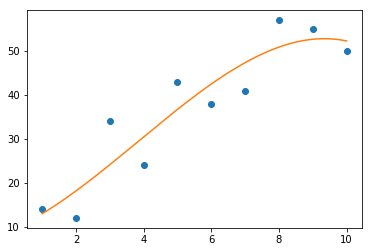

In [23]:
x = np.arange(1, 11)
y = np.array([14, 12, 34, 24, 43, 38, 41, 57, 55, 50])

coef = np.polyfit(x, y, 3)
p = np.poly1d(coef)
xx = np.linspace(1, 10, 1000)
yy = p(xx)
plt.plot(x, y, 'o')
plt.plot(xx, yy)
plt.show()

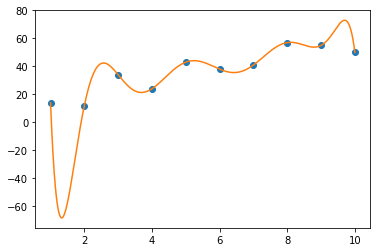

In [24]:
coef = np.polyfit(x, y, 9)
p = np.poly1d(coef)
xx = np.linspace(1, 10, 1000)
yy = p(xx)
plt.plot(x, y, 'o')
plt.plot(xx, yy)
plt.show()

<h1>Python Exercise 3: Linear Regression with Multiple Variables</h1>

Load the dataset representing the length of a fish as a function of its age and water temperature. See more details in <a href="http://people.sc.fsu.edu/~jburkardt/datasets/regression/x06.txt">link</a>. 

Dataset contain 2 feature variables and one target variable, and 44 samples. Save the file as 'fish.txt' and load data with the commands below. Create a $44\times 3$ matrix $X$ by adding a constant column of 1's. Format $y$ as a $44\times 1$ matrix.

Create a model
$$F = \theta_0 + \theta_1 A + \theta_1 T$$
where $F$ is the fish size, $A$ as the age of the fish and $T$ is the water temperature.

Calculate the coefficients by
$$M = (X^T X)^{-1} X^T y$$

Calculate the mean average error (MAE) between the estimated and measured fish sizes by
$$\frac{1}{n} \sum_{i=1}^n |\hat{F} - F|$$
where $\hat{F}$ is the estimated fish size and $F$ is the measured fish size.

In [30]:
data = np.loadtxt('fish.txt', skiprows=37)
X = data[:, 1:3]
y = data[:, 3:]

In [34]:
n = len(X)
X = np.concatenate((np.ones((n, 1)), X), axis=1)
y = y.reshape(n, 1)

M = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

y_hat = X.dot(M)
print('Mean average error =', np.sum(np.abs(y_hat - y))/n)

Mean average error = 459.372965905


In [40]:
print('Comparing original y-values with predictions:')
np.concatenate((y, y_hat), axis=1)

Comparing original y-values with predictions:


array([[  620.        ,  1611.29465238],
       [ 1315.        ,  1978.6641971 ],
       [ 2120.        ,  2319.79306006],
       [ 2600.        ,  2687.16260478],
       [ 3110.        ,  3054.5321495 ],
       [ 3535.        ,  3421.90169422],
       [ 3935.        ,  3789.27123895],
       [ 4465.        ,  4156.64078367],
       [ 4530.        ,  4524.01032839],
       [ 4570.        ,  4891.37987311],
       [ 4600.        ,  5258.74941783],
       [  625.        ,  1398.46737966],
       [ 1215.        ,  1765.83692438],
       [ 2110.        ,  2106.96578733],
       [ 2805.        ,  2474.33533205],
       [ 3255.        ,  2841.70487678],
       [ 4015.        ,  3209.0744215 ],
       [ 4315.        ,  3576.44396622],
       [ 4495.        ,  3943.81351094],
       [ 4535.        ,  4311.18305566],
       [ 4600.        ,  4678.55260038],
       [ 4600.        ,  5045.9221451 ],
       [  590.        ,  1185.64010693],
       [ 1305.        ,  1553.00965165],
       [ 2140.  

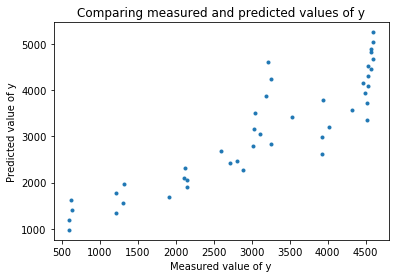

In [48]:
plt.plot(y, y_hat, '.')
plt.title('Comparing measured and predicted values of y')
plt.xlabel('Measured value of y')
plt.ylabel('Predicted value of y')
plt.show()
